# Medical Cost Dataset
**Author:** Brett Neely

**Date:** April 5, 2025  

**Introduction:** The purpose of this notebook is to use model(s) to predict insurances charged based on the features in the dataset. The dataset includes insurance charges in the **charges** field and 6 additional fields: age, sex, bmi, children, smoker, and region. The models utilized in this dataset were:
- Linear Regression
- Pipeline Implementation

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

### Section 1: Import The Dataset

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv("data/insurance.csv")

In [3]:
# Display the first 10 rows
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Display summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Section 1 Reflection

This dataset has 1338 records with 7 features. All features have values as there are no nulls. The age and children fields are numerical. The bmi and charges fields are floats. The sex, smoker, and region fields are categorical.

### Section 2: Data Exploration and Preparation
#### 2.1 Explore Data Patterns and Distributions

Create visualizations for the data for a deeper understanding.

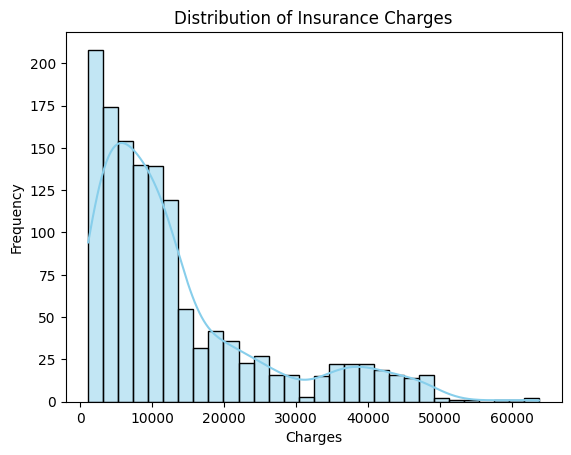

In [5]:
# Distribution of insurance charges

sns.histplot(df['charges'], kde=True, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

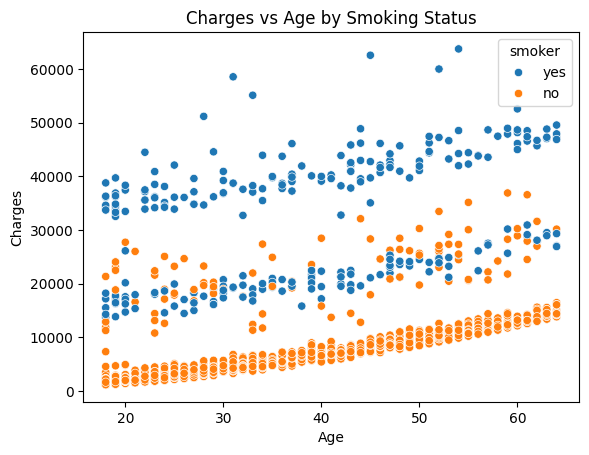

In [6]:
# Scatterplot of Charges vs Age by Smoking Status

sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Charges vs Age by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

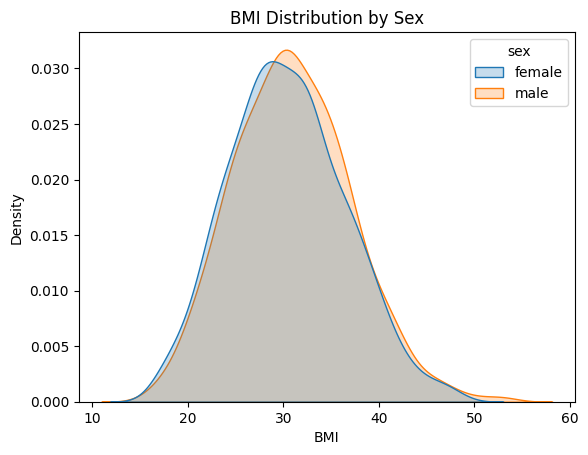

In [7]:
# BMI Distribution by Sex

sns.kdeplot(data=df, x='bmi', hue='sex', fill=True)
plt.title('BMI Distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

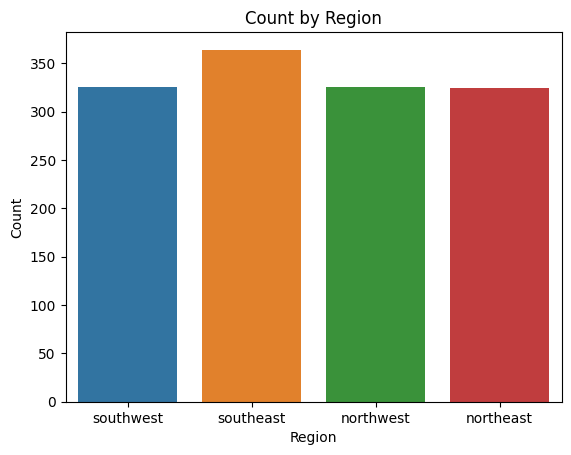

In [8]:
# Countplot to show distribution of region

sns.countplot(data=df, x='region', hue='region')
plt.title('Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

#### 2.2 Feature Engineering

In [9]:
# Check columns that may only have one value, no values need to be dropped because every field contains unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
# Encode categorical fields (sex & smoker to 1 and 0)

df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

#### Section 2 Reflection

- Some noticable patterns included that smokers had higher insurances charges
- Southeast had more data data points in the dataset than any other region
- Very few data points had insurance charges over 50,000. Most were in the 100-300 range.

The smoker and BMI feature definitely stand out as potentials for predicing insurance charges. The only preprocessing steps completed were to encode the categorical fields for sex & smoker.

### Section 3: Feature Selection and Justification
#### 3.1 Choose Features and Target

In [11]:
# Choose three features for predicting charges: age, smoker, and sex
# All 3 of these features should be good predictors for higher insurance charges.
X = df[['age', 'smoker', 'sex']]
y = df['charges']

#### Section 3 Reflection

Based on my knowledge of healthcare data and insurance data, a smoker is likely to have more insurance charges. An older patient is also likely to have more medical problems. I am not sure if sex will correlate to more insurance charges or not. I expect smoker & age to be very accurate.

### Section 4: Train a Model (Random Forest)
#### 4.1 Split the data

In [12]:
# Use 80/20 split for training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.2 Train the model

In [13]:
# Train the model with Scikit-learn Linear Regression Model.fit() method
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions
y_pred = model.predict(X_test)

#### 4.3 Evaluate performance

In [15]:
# Calculate the following:
# - R-squared
# - Mean Absolute Error
# - Mean Squared Error
# - Root Mean Squared Error

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

In [16]:
# Print the results of calculations
print(f'R-squared: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

R-squared: 0.7535
Mean Absolute Error (MAE): 3989.6651
Root Mean Squared Error (RMSE): 6186.3977


#### Section 4 Reflection

- The R2 of 0.7535 indicates the model does a good job capturing the relationship between features (age, sex, smoker) and charges. There is still close to 25% of variance that the model does not capture.
- The MAE of 3989.6651 indicates the average amount off from actual insurance charges.
- The RMSE of 6186.3977 means the model is off by about this amount when making predictions for insurance charges.

These numbers make sense given the features selected (and additional ones that were not) as well as the variability in insurance charges amounts.

### Section 5: Compare Alternative Model - Implement Pipeline
#### 5.1 Pipeline Model Creation

In [17]:
# Apply StandardScaler to the numerical features; categorical features are left out of the transformer

# In the pipeline, we are also including bmi and children for numerical features

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

In [18]:
# Build the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [19]:
# Split the data
X = df[['age', 'smoker', 'sex', 'bmi', 'children']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', 'passthrough',
                                                  ['sex', 'smoker'])])),
                ('regressor', LinearRegression())])

In [21]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [22]:
# Calculate the following:
# - R-squared
# - Mean Absolute Error
# - Mean Squared Error
# - Root Mean Squared Error

r2_pipeline = r2_score(y_test, y_pred)

mae_pipeline = mean_absolute_error(y_test, y_pred)

mse_pipeline = mean_squared_error(y_test, y_pred)

rmse_pipeline = np.sqrt(mse_pipeline)

In [23]:
# Print the results
print(f'R-squared: {r2_pipeline:.4f}')
print(f'Mean Absolute Error (MAE): {mae_pipeline:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_pipeline:.4f}')

R-squared: 0.7811
Mean Absolute Error (MAE): 4213.4848
Root Mean Squared Error (RMSE): 5829.1729


In [24]:
# Print the results of the linear regression and pipeline models side by side for analysis

print(f"{'Metric':<35} {'Linear Regression':<20} {'StandardScaler':<20}")
print("="*65)

metrics = [("R-squared", r2, r2_pipeline),
           ("Mean Absolute Error (MAE)", mae, mae_pipeline),
           ("Mean Squared Error (MSE)", mse, mse_pipeline),
           ("Root Mean Squared Error (RMSE)", rmse, rmse_pipeline)]

for metric_name, lr_value, pipeline_value in metrics:
    print(f"{metric_name:<35} {lr_value:<20.4f} {pipeline_value:<20.4f}")

Metric                              Linear Regression    StandardScaler      
R-squared                           0.7535               0.7811              
Mean Absolute Error (MAE)           3989.6651            4213.4848           
Mean Squared Error (MSE)            38271516.6262        33979257.0508       
Root Mean Squared Error (RMSE)      6186.3977            5829.1729           


#### Section 5 Reflection

- The Pipeline model explains more variance in the data with an R2 of 0.7811 vs. 0.7535 for the Linear Regression.
- The Linear Regression had a lower MAE which indicates it has better overall accuracy.
- Finally, for the RMSE, the Pipeline model had slightly better peformance in handling errors.

To conclude, the Pipeline model seems to be a better model in this case because of a higher R2 and a lower RMSE. It is important to note that the Pipeline method also included additional features (children and bmi) that were not trained in the Linear Regression model.

### Section 6: Final Thoughts & Insights

Both the Linear Regression and Pipeline models were reliable models for predicting insurance charges. However, the Pipeline model had better overall performance.

There were minimal challenges faced as the model performance was straightforward and there was no much data cleaning required for this dataset. Encoding was applied to categorical fields.

For future analysis, additional models should be tested against the dataset. Models can be evaluated against each other for better overall accuracy. A new feature could also be created for age * bmi for a net new feature to train against.

From this project, the skills gained were training 2 different types of models against features. Data was analyzed for accuracy and reflections were summarized. This notebook can be re-utilized against alternative datasets.